In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:/Users/ShellFoodmart/Downloads/medical_insurance.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [11]:
corr = df.describe()

In [12]:
df.corr

<bound method DataFrame.corr of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
2767   47    0  45.320         1       0       2   8569.86180
2768   21    0  34.600         0       0       3   2020.17700
2769   19    1  26.030         1       1       1  16450.89470
2770   23    1  18.715         0       0       1  21595.38229
2771   54    1  31.600         0       0       3   9850.43200

[2772 rows x 7 columns]>

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
categorical_columns = ["sex", "smoker", "region"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180
2768,21,0,34.600,0,0,3,2020.17700
2769,19,1,26.030,1,1,1,16450.89470
2770,23,1,18.715,0,0,1,21595.38229


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

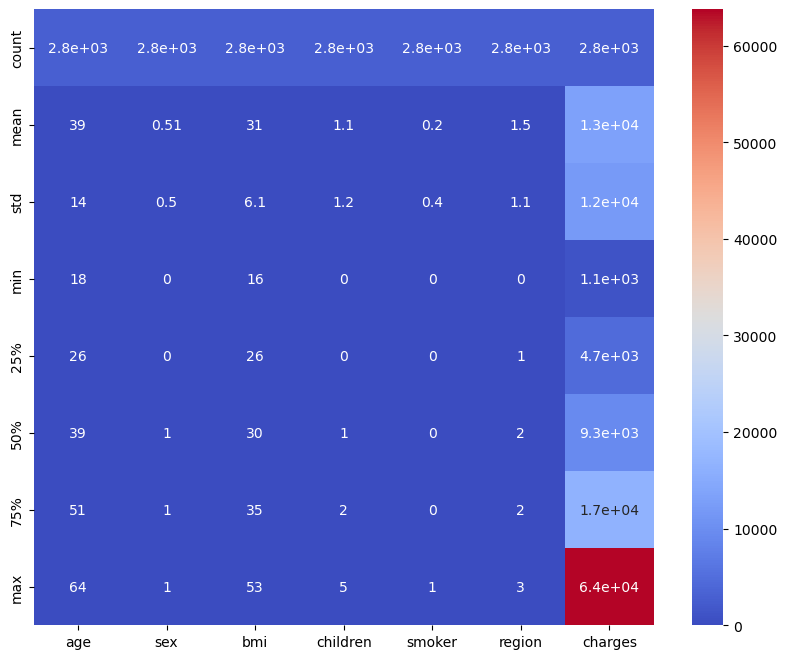

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
X = df.drop('charges', axis=1)
y = df['charges']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
model = SVR(kernel='linear', C=1.0) 

In [32]:
model.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [33]:
y_pred = model.predict(X_test_scaled)


In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [35]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 138327202.82
R-squared (R2): 0.10


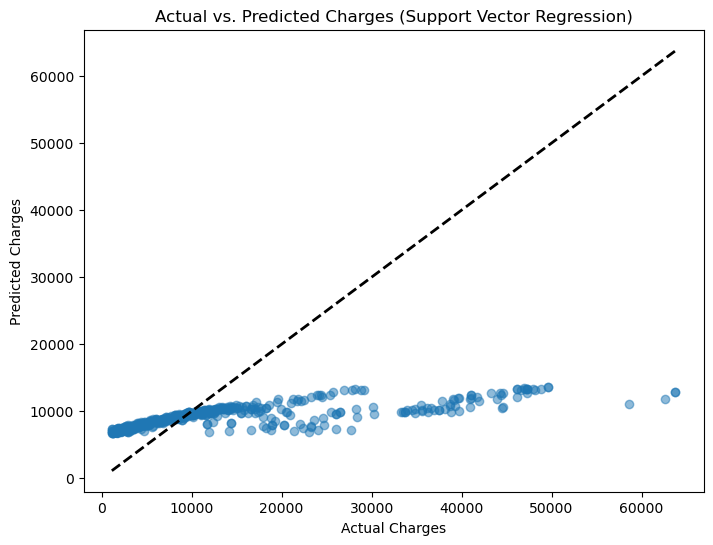

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Support Vector Regression)")
plt.show()